# EDA Internship Task Week 6

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud
pio.templates.default = "plotly_white"
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("births.csv")
data.head(20)

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
5,1969,1,3.0,M,4994
6,1969,1,4.0,F,4440
7,1969,1,4.0,M,4520
8,1969,1,5.0,F,4192
9,1969,1,5.0,M,4198


# Show column names and have a look at their info.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


# Q.1: Add a new column “Decade” by calculating. For example 1969 will be 1960, 1988 will 1980 etc.


In [4]:
# Function to calculate decade
def calculate_decade(year):
    return (year // 10) * 10

# Add a new column 'Decade'
data['Decade'] = data['year'].apply(calculate_decade)

# Display the DataFrame
data

,year,month,day,gender,births,Decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


# Q.2: Show the descriptive statistics of the data.


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,15547.0,1979.037435,6.728340,1969.0,1974.0,1979.0,1984.0,2008.0
month,15547.0,6.515919,3.449632,1.0,4.0,7.0,10.0,12.0
day,15067.0,17.769894,15.284034,1.0,8.0,16.0,24.0,99.0
births,15547.0,9762.293561,28552.465810,1.0,4358.0,4814.0,5289.5,199622.0
Decade,15547.0,1974.544285,6.789583,1960.0,1970.0,1970.0,1980.0,2000.0


# Q.3: Check if your data contains any missing values


In [6]:
data.describe(include='all')


,year,month,day,gender,births,Decade
count,15547.000000,15547.000000,15067.000000,15547,15547.000000,15547.000000
unique,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,NaN,F,NaN,NaN
freq,NaN,NaN,NaN,7776,NaN,NaN
mean,1979.037435,6.515919,17.769894,NaN,9762.293561,1974.544285
std,6.728340,3.449632,15.284034,NaN,28552.465810,6.789583
min,1969.000000,1.000000,1.000000,NaN,1.000000,1960.000000
25%,1974.000000,4.000000,8.000000,NaN,4358.000000,1970.000000
50%,1979.000000,7.000000,16.000000,NaN,4814.000000,1970.000000
75%,1984.000000,10.000000,24.000000,NaN,5289.500000,1980.000000


In [7]:
data.isna()

,year,month,day,gender,births,Decade
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
15542,False,False,True,False,False,False
15543,False,False,True,False,False,False
15544,False,False,True,False,False,False
15545,False,False,True,False,False,False


In [8]:
data.isna().sum()

year        0
month       0
day       480
gender      0
births      0
Decade      0
dtype: int64

In [9]:
data.dtypes

year        int64
month       int64
day       float64
gender     object
births      int64
Decade      int64
dtype: object

# Q.4: What is the trend of male & female births every decade?

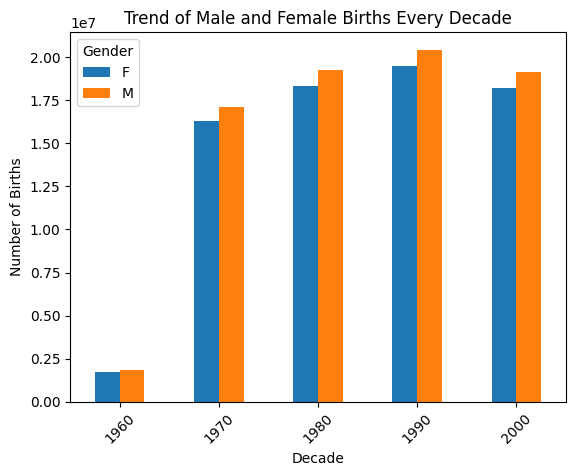

In [10]:
# Step 1: Calculate total births for each decade and gender
data['Decade'] = (data['year'] // 10) * 10
decade_births = data.groupby(['Decade', 'gender'])['births'].sum().unstack()

# Step 2: Plot the trend
decade_births.plot(kind='bar')
plt.title('Trend of Male and Female Births Every Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Births')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

# Q.5: To remove outliers from dataset following techinque to include only those values that fall within 5 standard deviations from the mean.This is a common statistical technique used to focus on the central tendency of the data while excluding extreme values. Use this technique to remove outliers.


# For Births

In [11]:
# Step 1: Calculate mean and standard deviation
mean_value = data['births'].mean()
std_dev = data['births'].std()

# Step 2: Define the range within which values are considered non-outliers
lower_bound = mean_value - 5 * std_dev
upper_bound = mean_value + 5 * std_dev

# Step 3: Filter the dataset to include only values within this range
filtered_data = data[(data['births'] >= lower_bound) & (data['births'] <= upper_bound)]
# Display the filtered DataFrame
print(filtered_data)

       year  month  day gender  births  Decade
0      1969      1  1.0      F    4046    1960
1      1969      1  1.0      M    4440    1960
2      1969      1  2.0      F    4454    1960
3      1969      1  2.0      M    4548    1960
4      1969      1  3.0      F    4548    1960
...     ...    ...  ...    ...     ...     ...
15309  1999      2  NaN      F  145172    1990
15357  2001      2  NaN      F  148640    2000
15381  2002      2  NaN      F  148745    2000
15405  2003      2  NaN      F  150278    2000
15453  2005      2  NaN      F  151342    2000

[15086 rows x 6 columns]


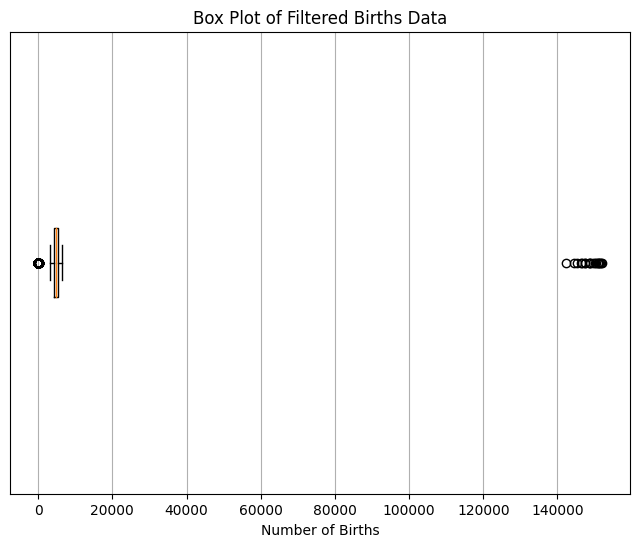

In [12]:
# Create a box plot of the filtered births data
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_data['births'], vert=False)
plt.title('Box Plot of Filtered Births Data')
plt.xlabel('Number of Births')
plt.yticks([])
plt.grid(True)
plt.show()

# For Decade

In [13]:
# Step 1: Calculate mean and standard deviation
mean_value = data['Decade'].mean()
std_dev = data['Decade'].std()

# Step 2: Define the range within which values are considered non-outliers
lower_bound = mean_value - 5 * std_dev
upper_bound = mean_value + 5 * std_dev

# Step 3: Filter the dataset to include only values within this range
filtered_data = data[(data['Decade'] >= lower_bound) & (data['Decade'] <= upper_bound)]
# Display the filtered DataFrame
print(filtered_data)

       year  month  day gender  births  Decade
0      1969      1  1.0      F    4046    1960
1      1969      1  1.0      M    4440    1960
2      1969      1  2.0      F    4454    1960
3      1969      1  2.0      M    4548    1960
4      1969      1  3.0      F    4548    1960
...     ...    ...  ...    ...     ...     ...
15542  2008     10  NaN      M  183219    2000
15543  2008     11  NaN      F  158939    2000
15544  2008     11  NaN      M  165468    2000
15545  2008     12  NaN      F  173215    2000
15546  2008     12  NaN      M  181235    2000

[15547 rows x 6 columns]


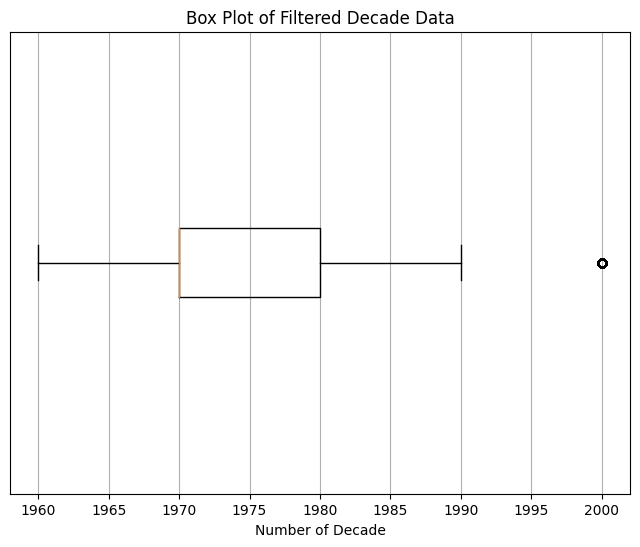

In [14]:
# Create a box plot of the filtered births data
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_data['Decade'], vert=False)
plt.title('Box Plot of Filtered Decade Data')
plt.xlabel('Number of Decade')
plt.yticks([])
plt.grid(True)
plt.show()

# Q.6: Plot births by weekday for several decades. Write down your observation.


<Axes: xlabel='day'>

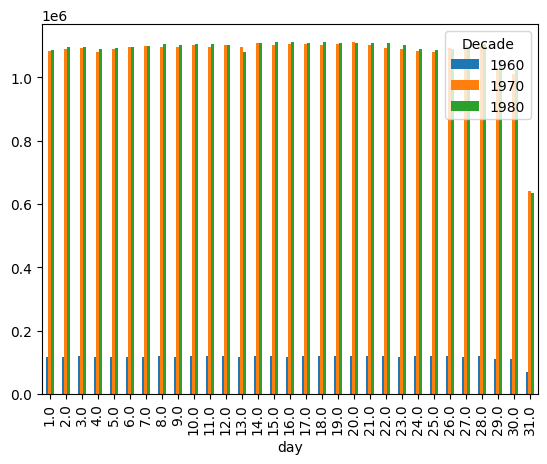

In [15]:
birth_days = data.groupby(['day','Decade'])['births'].sum().unstack()
birth_days.drop(99,inplace=True)
birth_days.plot(kind='bar')

# Q.7: Group the data by month and day separately


In [17]:
# Group the data by month and sum the number of births for each month
births_by_month = data.groupby('month')['births'].sum()

# Group the data by day and sum the number of births for each day
births_by_day = data.groupby('day')['births'].sum()

# Display the grouped data
print("Births by Month:")
print(births_by_month)
print("\nBirths by Day:")
print(births_by_day)

Births by Month:
month
1     12364197
2     11541178
3     12678844
4     12085891
5     12624972
6     12521070
7     13367556
8     13528007
9     13252831
10    12954950
11    12197967
12    12656915
Name: births, dtype: int64

Births by Day:
day
1.0     2286854
2.0     2303168
3.0     2309087
4.0     2286588
5.0     2296951
6.0     2308073
7.0     2314081
8.0     2322376
9.0     2315055
10.0    2327197
11.0    2319561
12.0    2322956
13.0    2290896
14.0    2335551
15.0    2333426
16.0    2332456
17.0    2335458
18.0    2334949
19.0    2331183
20.0    2337631
21.0    2329563
22.0    2317711
23.0    2305174
24.0    2290500
25.0    2283975
26.0    2300208
27.0    2314088
28.0    2328630
29.0    2189278
30.0    2141788
31.0    1342126
99.0       6403
Name: births, dtype: int64


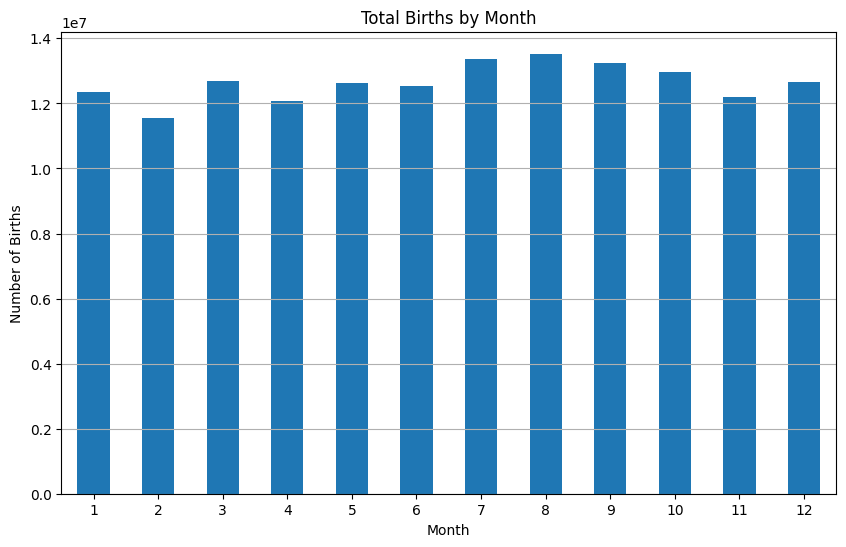

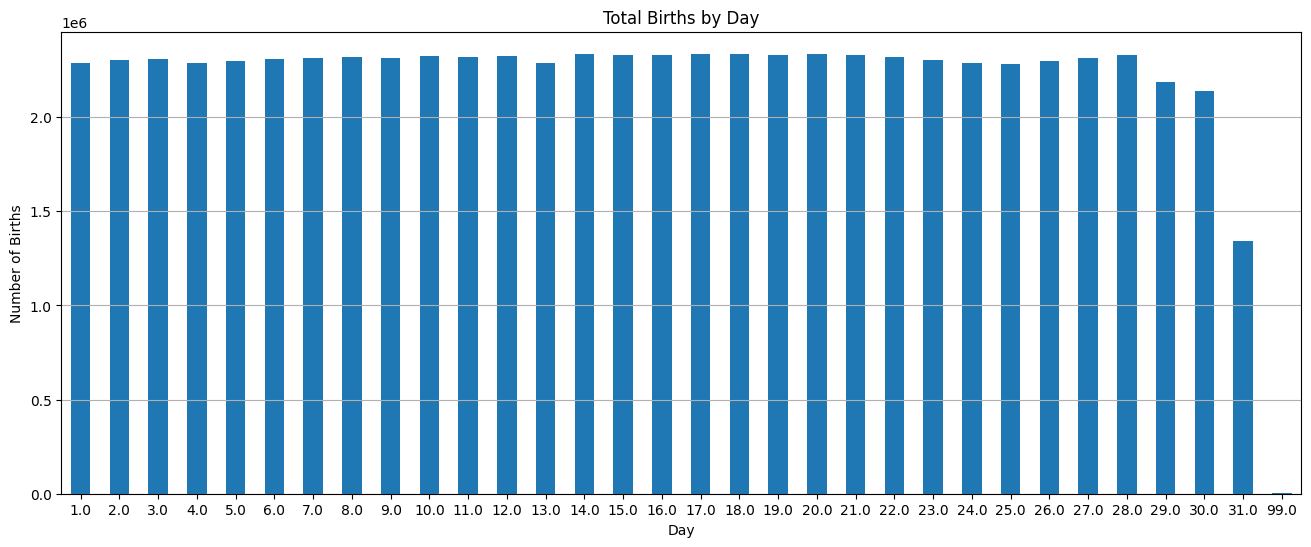

In [20]:
# Group the data by month and sum the number of births for each month
births_by_month = data.groupby('month')['births'].sum()

# Group the data by day and sum the number of births for each day
births_by_day = data.groupby('day')['births'].sum()

# Plot births by month
plt.figure(figsize=(10, 6))
births_by_month.plot(kind='bar')
plt.title('Total Births by Month')
plt.xlabel('Month')
plt.ylabel('Number of Births')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Plot births by day
plt.figure(figsize=(16, 6))
births_by_day.plot(kind='bar')
plt.title('Total Births by Day')
plt.xlabel('Day')
plt.ylabel('Number of Births')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

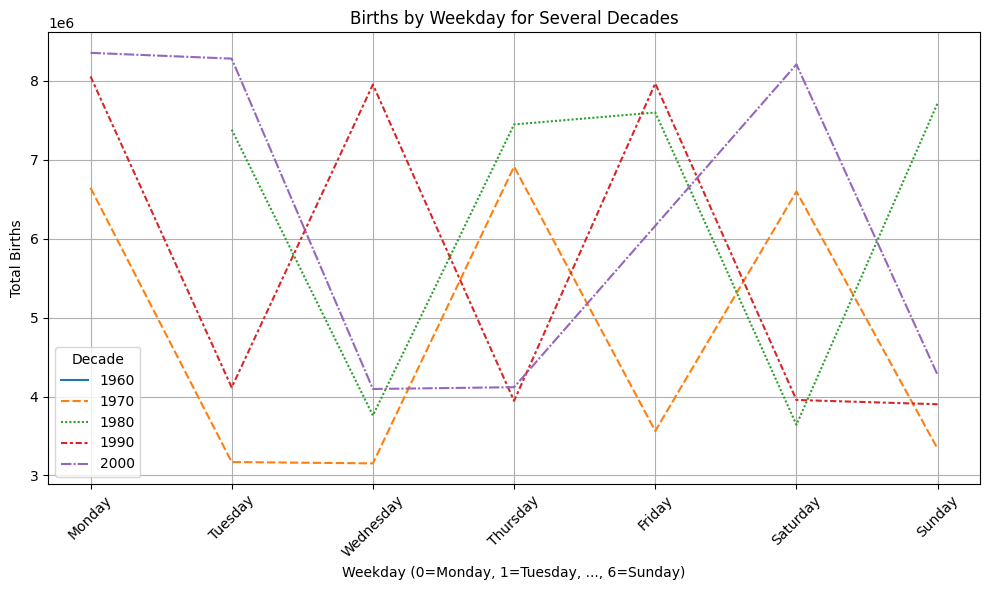

In [19]:
data['year'] = pd.to_datetime(data['year'], format='%Y')

# Extract weekday information
data['weekday'] = data['year'].dt.weekday

# Group data by weekday and decade, then calculate the total births
weekday_births = data.groupby(['weekday', 'Decade'])['births'].sum().unstack()

# Plot births by weekday for several decades
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekday_births)
plt.title('Births by Weekday for Several Decades')
plt.xlabel('Weekday (0=Monday, 1=Tuesday, ..., 6=Sunday)')
plt.ylabel('Total Births')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.legend(title='Decade')
plt.grid(True)
plt.tight_layout()
plt.show()

# Q.8: Focusing on the month and day only, you have a time series reflecting the average number of births by date of the year. From this, plot the data

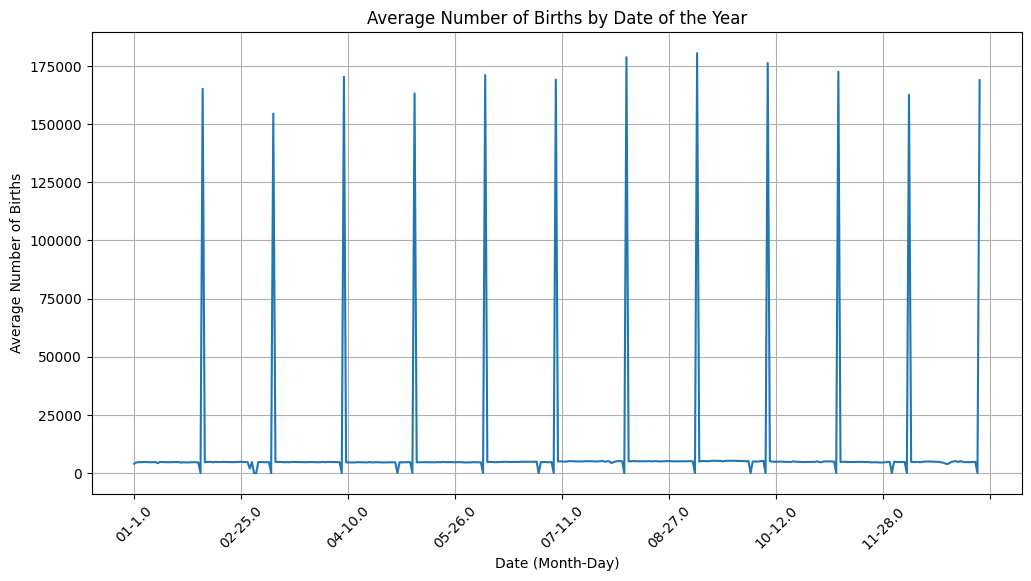

In [24]:
# Combine 'month' and 'day' columns to create a new column 'month_day'
data['month_day'] = data['month'].astype(str).str.zfill(2) + '-' + data['day'].astype(str).str.zfill(2)

# Group the data by 'month_day' and calculate the average number of births for each date
average_births_by_date = data.groupby('month_day')['births'].mean()

# Plot the average number of births by date
plt.figure(figsize=(12, 6))
average_births_by_date.plot(kind='line')
plt.title('Average Number of Births by Date of the Year')
plt.xlabel('Date (Month-Day)')
plt.ylabel('Average Number of Births')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

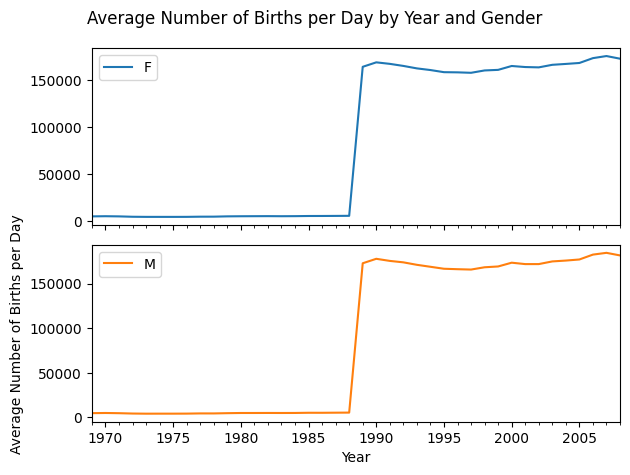

In [28]:
avg_births = data.groupby(['year', 'gender'])['births'].mean().unstack()

# Plot the time series
avg_births.plot(subplots=True, layout=(2,1))
plt.xlabel('Year')
plt.ylabel('Average Number of Births per Day')
plt.suptitle('Average Number of Births per Day by Year and Gender')
plt.tight_layout()
plt.show()